# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests 
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [24]:
cities

['georgetown',
 'chonchi',
 'patos',
 'little cayman',
 'salto de pirapora',
 'ust-nera',
 'colonia',
 'adamstown',
 'stanley',
 'chissamba',
 'wailua homesteads',
 'yellowknife',
 'puerto natales',
 'mazagao',
 'harper',
 'blackmans bay',
 'constantia',
 'cheremkhovo',
 'haiku-pauwela',
 'grytviken',
 "nar'yan-mar",
 'port-aux-francais',
 'kayenta',
 'barclayville',
 'flying fish cove',
 'kendari',
 'cabo san lucas',
 'keflavik',
 'ivanava',
 'papatowai',
 'taiohae',
 'bodo',
 'hermanus',
 'lebu',
 'red hill',
 'nikolayevsk-on-amure',
 'carnarvon',
 'lospalos',
 'karratha',
 'zhaoyuan',
 'bilibino',
 'mana',
 'waitangi',
 'ribeira grande',
 'kavaratti',
 'kamina',
 'ed damer',
 'west island',
 'kudahuvadhoo',
 'seryshevo',
 'hawaiian paradise park',
 'iqaluit',
 'pesqueira',
 'santa ana',
 'deir ez-zor',
 'edinburgh of the seven seas',
 'albany',
 'warrenton',
 'alice springs',
 'freetown',
 'mitu',
 'kiunga',
 "nuku'alofa",
 'kailua-kona',
 'singkil',
 'puerto ayora',
 'luganville',


In [10]:
# testing predicted URL

#url = "https://api.openweathermap.org/data/2.5/weather?"
#city_url = url + "appid=" + weather_api_key + "&q=" + city
#city_weather = requests.get(city_url).json()
#print(json.dumps(city_weather, indent=4, sort_keys=True))
#weather_response_json = city_weather.json()

In [ ]:
# get data from one url endpoint (from city to lat)
# store lat/lng data in new list 
# convert list to df (ref list for link)

#url building to retrieve lat/lng data for the cities specifically

#cityspec_base = "http://api.openweathermap.org/geo/1.0/direct?"
#cityspec_query = f"{cityspec_base}appid={weather_api_key}&q="
#lat = []
#lng = [] 

#for city in cities: 
#    response = requests.get(cityspec_query + city).json()
#    lat.append(response['lat'])
#    lng.append(response['lng'])

TypeError: list indices must be integers or slices, not str

In [25]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q="
city_weather = requests.get(city_url + city).json()
city_weather

{'coord': {'lon': 24.7314, 'lat': -34.0033},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 291.97,
  'feels_like': 291.34,
  'temp_min': 291.97,
  'temp_max': 291.97,
  'pressure': 1029,
  'humidity': 55,
  'sea_level': 1029,
  'grnd_level': 1002},
 'visibility': 10000,
 'wind': {'speed': 5, 'deg': 222, 'gust': 5.6},
 'clouds': {'all': 97},
 'dt': 1712829183,
 'sys': {'type': 2,
  'id': 2035063,
  'country': 'ZA',
  'sunrise': 1712810446,
  'sunset': 1712851373},
 'timezone': 7200,
 'id': 986717,
 'name': 'Kruisfontein',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather ["coord"]["lon"]
        city_lng = city_weather ["coord"]["lng"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
City not found. Skipping...
Processing Record 2 of Set 1 | chonchi
City not found. Skipping...
Processing Record 3 of Set 1 | patos
City not found. Skipping...
Processing Record 4 of Set 1 | little cayman
City not found. Skipping...
Processing Record 5 of Set 1 | salto de pirapora
City not found. Skipping...
Processing Record 6 of Set 1 | ust-nera
City not found. Skipping...
Processing Record 7 of Set 1 | colonia
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
City not found. Skipping...
Processing Record 9 of Set 1 | stanley
City not found. Skipping...
Processing Record 10 of Set 1 | chissamba
City not found. Skipping...
Processing Record 11 of Set 1 | wailua homesteads
City not found. Skipping...
Processing Record 12 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 13 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 14 o

[]

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lon"]
        city_lng = city_weather ["coord"]["lng"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
City not found. Skipping...
Processing Record 2 of Set 1 | tiksi
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 4 of Set 1 | utrik
City not found. Skipping...
Processing Record 5 of Set 1 | port mathurin
City not found. Skipping...
Processing Record 6 of Set 1 | wailua homesteads
City not found. Skipping...
Processing Record 7 of Set 1 | margaret river
City not found. Skipping...
Processing Record 8 of Set 1 | adamstown
City not found. Skipping...
Processing Record 9 of Set 1 | iqaluit
City not found. Skipping...
Processing Record 10 of Set 1 | sao tome
City not found. Skipping...
Processing Record 11 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 12 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 13 of Set 1 | atafu village
City not found. Skipping...
Processing Record 

In [ ]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q="
city_weather = requests.get(city_url + city).json()
city_weather

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [6]:
# Display sample data
city_data_df.head

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: []>

In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

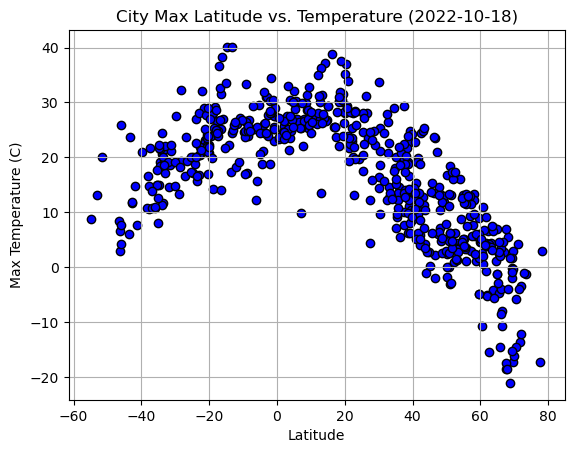

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

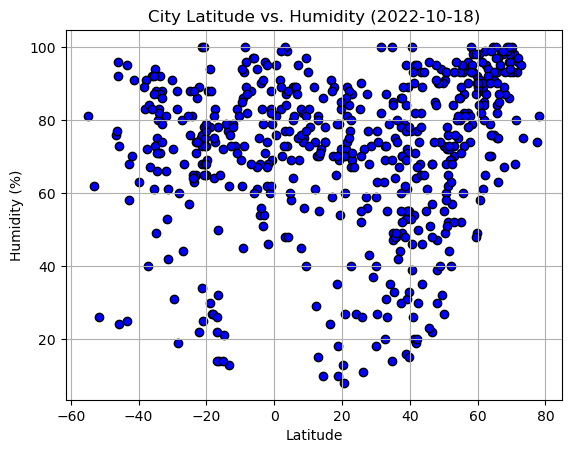

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

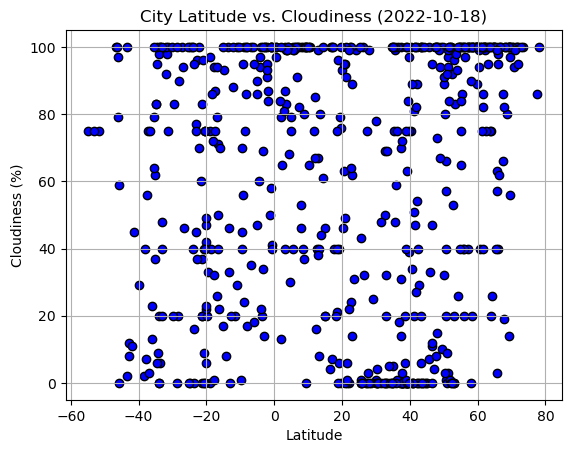

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

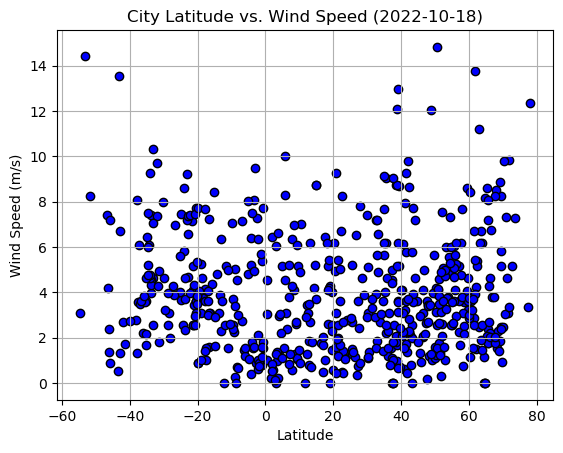

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
line_eq = "y = "+ str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

NameError: name 'slope' is not defined

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] <0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temp')

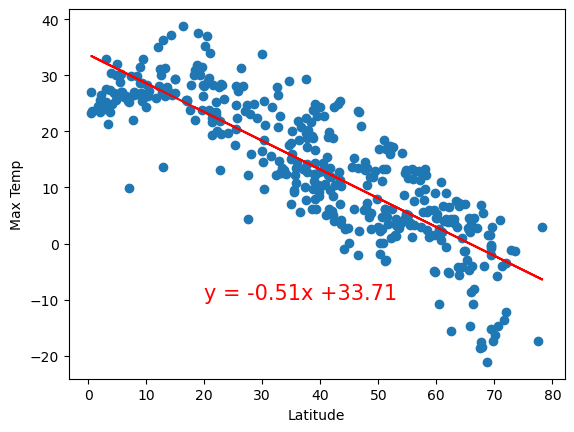

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.4121057168607252
The r value is: 0.6419546065421801


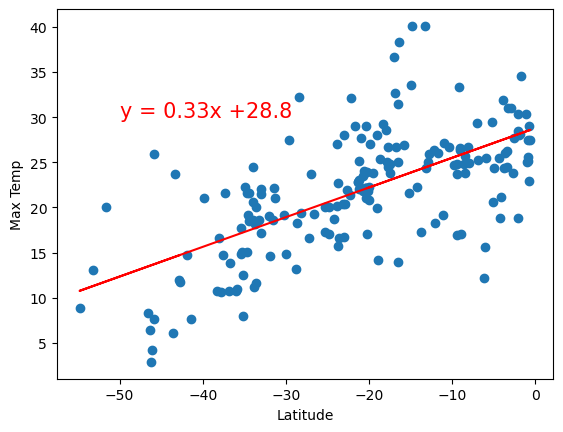

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05689741545789608
The r value is: 0.2385317912939407


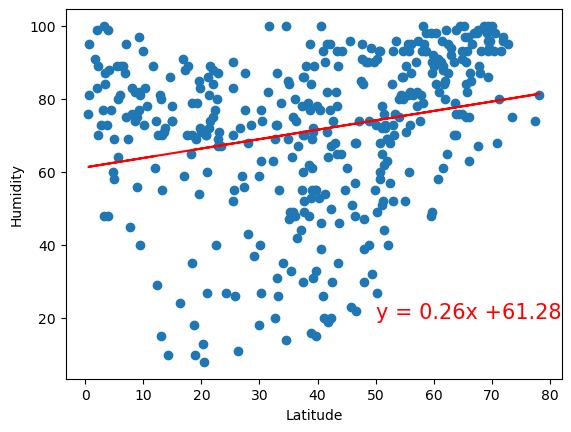

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.0002808747046324618
The r value is: 0.016759316950056818


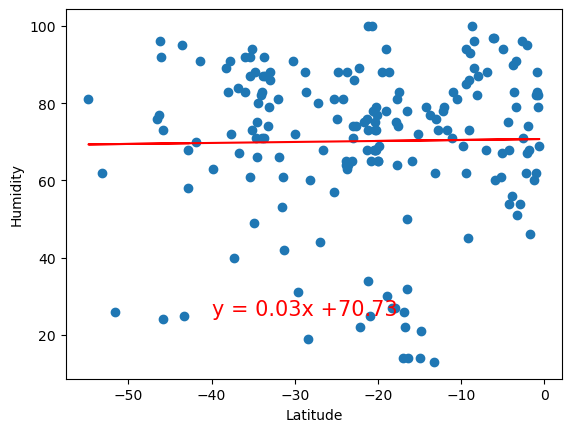

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024026517125811043
The r value is: 0.155004893876971


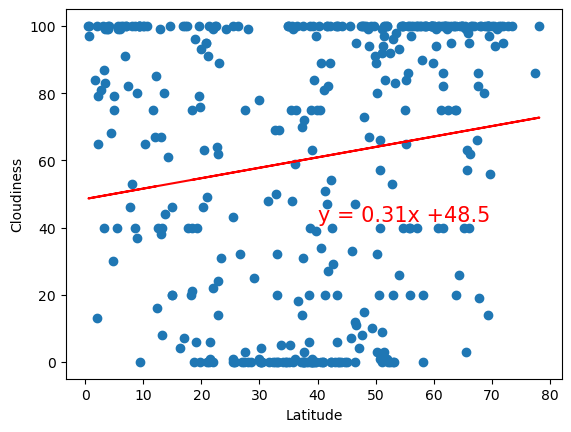

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,42),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.020567354299943663
The r value is: 0.14341322916643243


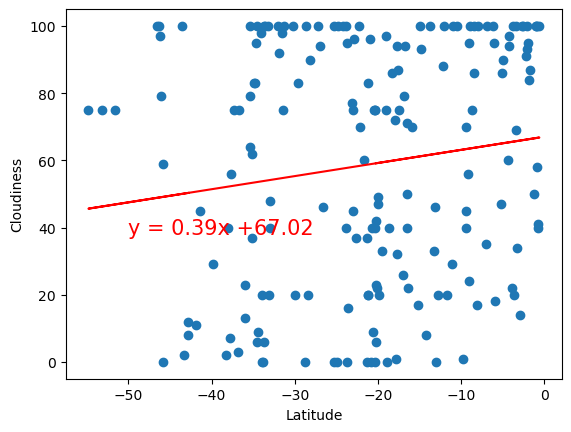

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,38),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030396762354449474
The r value is: 0.17434667290903338


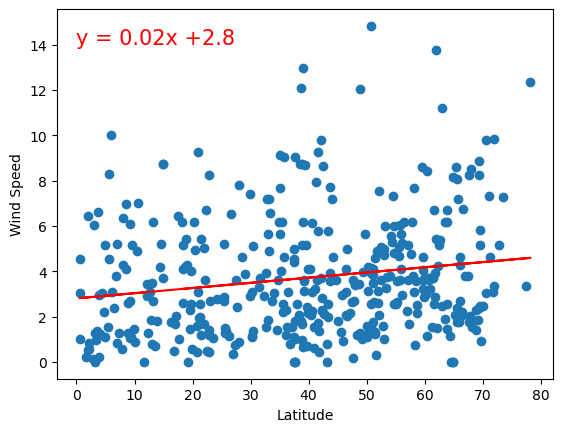

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.06223904070051575
The r value is: -0.24947753546264592


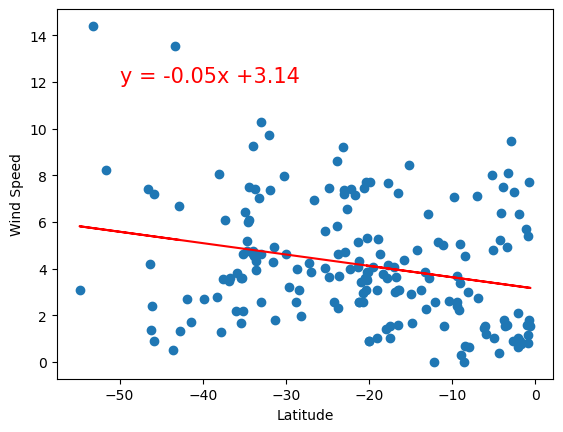

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE